In [11]:
require("epimdr")
plottime <- function(start, time, model, parms) {
  out = ode(
    y = start,
    time = time,
    func = model,
    parms = parms
  )
  Nvec<-out[, "S"] + out[, "E"] + out[, "I"] + out[, "R"]
  out<-cbind( out, Nvec)
  plot(x = out[, "time"],    y = out[, "S"],    ylab = "Number",   xlab = "Time",    type = "l",   xlim=c(min(time), max(time)),  ylim=c(0, max(out[, "Nvec"]))
  )
  lines(x = out[, "time"], y = out[, "E"], col = "orange")
  lines(x = out[, "time"], y = out[, "I"], col = "red")
  lines(x = out[, "time"], y = out[, "R"], col = "green")
  lines(x = out[, "time"], y = out[, "Nvec"], col = "purple")  
  legend( "bottomleft",legend = c("S", "E", "I", "R","N"), col = c("black", "orange", "red", "green","purple"),lty = 1,    cex = 0.8
  )
}

$  dS = \nu  N - \frac{\beta  I S}{N} - \mu S \\
  dE = \frac{\beta SI}{N} - (\sigma + \mu) \times E \\
  dI = \sigma E - (\alpha + \mu + \gamma) \times I \\
  dR = \gamma  I - \mu R \\
  \beta =-contact  \times \kappa_0 \times \log(1 - c)$

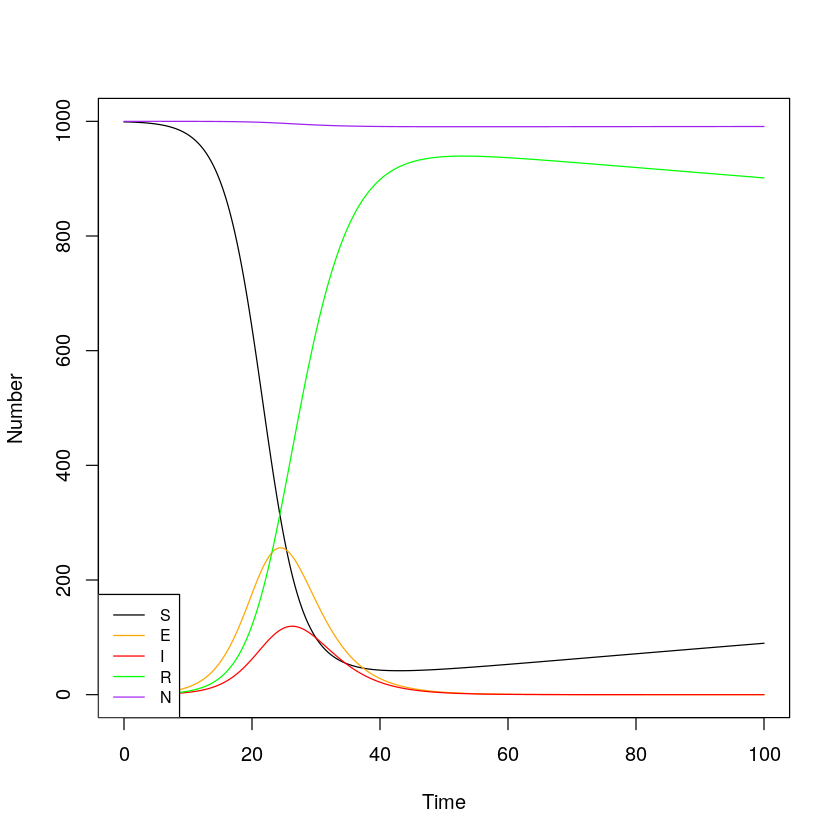

In [14]:

model <- function(time, values, parms) {
  #function where c changes with the climate and humidity at each timepoint
  #initial values
  S <- values[1]
  E <- values[2]
  I <- values[3]
  R <- values[4]
  #parameters
  kappa0 <- parms[["kappa0"]]
  mu <- parms[["mu"]]
  sigma <- parms[["sigma"]]
  alpha <- parms[["alpha"]]
  gamma <- parms[["gamma"]]
  contact <- parms[["contact"]]
  #temp and humidity are vectors in this model
  temp <- parms[["temp"]]
  humidity <- parms[["humidity"]]
  nu <- parms[["nu"]]
  N <- parms[["N"]]
  c <- parms[["c"]]
  beta <- -contact * kappa0 * log(1 - c)
 
    
  dS = nu * N - beta * I * S / N - mu * S
  dE = beta * S * I / N - (sigma + mu) * E
  dI = sigma * E - (alpha + mu + gamma) * I
  dR = gamma * I - mu * R

 
  list(c(dS, dE, dI, dR))
}


c_climate <- function(temp, humidity) {
  # this function will show how c varies with temp and humidity
  return(0.1)
}
time = seq(0, 100, by = 1 / 10)
#parameters from bjornstad book and guesses- just to test functions work!
parms = c(
  mu = 0.001,
  sigma = 0.25 ,
  alpha = 0.005,
  kappa0 = 25,
  gamma = 1 / 2,
  contact = 0.7,
  temp = NA,
  humidity = NA,
  nu=0.001,
  N=1000,
  c=0.1
)
start = c(S = 0.999 * parms[["N"]],
          E = 0.001 * parms[["N"]],
          I = 0.00 * parms[["N"]],
          R = 0 * parms[["N"]])
plottime(
  time = time,
  parms = parms,
  start = start,
  model = model
)


## Parameter table

|Parameter|Meaning|Unit|Origin|
|------|------|------|------|
|$\alpha$     |rate of disease induced mortality (per capita?)   |$day^-1$|Bjørnstad 2018|
|$\beta$     |transmission rate per infective per day    | $day^-1$   |Keeling and Rohani 2007|
|$\beta_0$     |initial transmission rate (pre-intervention) per infective per day|$day^-1$     |Keeling and Rohani 2007 for $\beta$|
|$\beta_{max}$     |transmission rate in an ideal climate per infective per day |$day^-1$  |Keeling and Rohani 2007 for $\beta$|
|$contact$     |proportion of usual contact rate|-     |related to Neher et al 2020|
|$\gamma$     |recovery rate per day- probably of recovery for an individual per day (reciprocal of infectious period)   |$day^-1$|Keeling and Rohani 2007|
|$\mu$    |natural per capita death rate per day-not caused by disease|$day^-1$  |Keeling and Rohani 2007|
|$\nu$    |natural per capita birth rate per day|$day^{-1}$ |Keeling and Rohani 2007|
|$\sigma$     |rate of movement from E to I (reciprocal of latent period)|$day^-1$|Keeling and Rohani 2007|
|$\kappa$   |average number of contacts per individual per unit time|$day^-1$ |Keeling and Rohani 2007|
|$c$     |probability of successful transmission following a contact|-     |Keeling and Rohani 2007|
|$S$     |number of susceptibles    |   $individuals$  |Keeling and Rohani 2007|
|$E$     |number of exposed |   $individuals$   |Keeling and Rohani 2007|
|$I$     |number of infected     |   $individuals$  |Keeling and Rohani 2007|
|$R$     |number of recovered    |   $individuals$  |Keeling and Rohani 2007|
|$N$     |number of individuals in population   |  $individuals$  |Bjornstad|
|$V$     |pathogen ?density     | EG $particles \times {m}^{-3}$  |Brauer 2017|
|$\beta_d$    |person-person contact rate|$day^-1$|Brauer 2017, tien and earn 2010|
|$\beta_i$     |reservoir-person contact rate|$particles^{-1} m^3 day^{-1} $|Brauer 2017, Tien and Earn 2010|
|$\kappa_0$    |unmodified average number of contacts|$day^{-1}$||
|$temp$  |temperature |degrees c|-|
|$humidity$   |relative humidity|%|-|
|$\delta$   |rate at which the pathogen loses infectivity (1/delta is lifetime)|$day^{-1}$|Brauer 2017|
|$f$  |rate of loss of immunity|$day^{-1}$|Brauer 2010 (temporary immunity)|
|$r$  |shedding rate|$particles \times m^{-3} individual^{-1} day^{-1}$|Brauer 2017|

units calculated from:  
units of dv/dt equation being $particles \times m^{-3} day^{-1}$  
units of de/dt,ds/st,di/dt, dr/dt $individuals \times day^{-1}$  

% some models are scaled, some are not so I'm finding it hard to interpret some of the parameters
